In [1]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import json
import ntpath
import mixamo_helper as mm_helper
from mixamo_helper import Mixamo
from IPython.display import clear_output
import copy
import glm
import pyglm_helper as glmh
from multiprocessing import Process, Pool

In [2]:
def find_hips(pixel3d_json):
    if pixel3d_json["name"] == 'Hips':
        return [True, pixel3d_json]
    else:
        for child in pixel3d_json["child"]:
            is_find, result = find_hips(child)
            if is_find:
                return [is_find, result]
        return [False, None]

In [3]:
def get_anim_json(anim_file_name, model_file_name):
    anim_json_object = None
    with open(anim_file_name) as f:
        anim_json_object = json.load(f)
    pix3d_json_object = None
    with open(model_file_name) as f:
        pix3d_json_object = json.load(f)
    is_find, hip_node =  find_hips(pix3d_json_object["node"])
    if not is_find:
        return None
    mixamo_name_idx_map = mm_helper.get_mixamo_name_idx_map()

    size = len(anim_json_object["frames"])
    anim_file_json = {
        "fileName": anim_json_object["fileName"],
        "duration": anim_json_object["duration"],
        "ticksPerSecond": anim_json_object["ticksPerSecond"],
        "frames": [
        ]
    }
    my_pool = Pool()
    frame_json = [None for i in range(0,size)]
    for fidx in range(0, size):
        frame_json[fidx] = my_pool.apply_async(glmh.get_anim_frame_json, (anim_json_object, fidx, hip_node, mixamo_name_idx_map))
        
    my_pool.close()
    my_pool.join()
    for f in frame_json:
        if f != None:
            anim_file_json["frames"].append(f.get())
    with open('./output/'+ ntpath.basename(anim_file_name) + '_'+ntpath.basename(model_file_name) + '_final.json', 'w') as f:
        json_string = json.dump(anim_file_json, f, indent = 2)

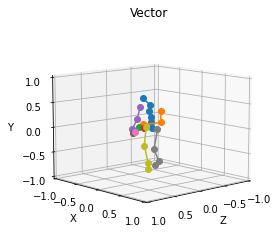

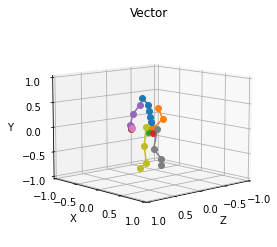

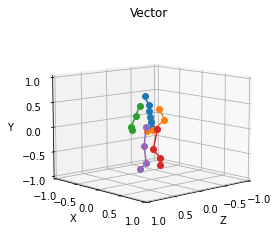

In [4]:
def get_anim_gif(anim_file_name, model_file_name):
    anim_json_object = None
    with open(anim_file_name) as f:
        anim_json_object = json.load(f)
    pix3d_json_object = None
    with open(model_file_name) as f:
        pix3d_json_object = json.load(f)
    is_find, hip_node =  find_hips(pix3d_json_object["node"])
    if not is_find:
        return None
    mixamo_name_idx_map = mm_helper.get_mixamo_name_idx_map()
    size = len(anim_json_object["frames"])
    my_pool = Pool()
    frames = [None for i in range(0,size)]
    for fidx in range(0, size):
        frames[fidx] = my_pool.apply_async(glmh.get_anim_frame_vec_list, (anim_json_object, fidx, hip_node, mixamo_name_idx_map))
        
    my_pool.close()
    my_pool.join()
    vec_list = []
    vec_group = None
    for frame in frames:
        rv, rg = frame.get()
        vec_list.append(rv)
        vec_group = rg
    glmh.glm_lists_to_gif(vec_list, rg, fps = anim_json_object["ticksPerSecond"], save_path='./', is_axes_move= True)
get_anim_gif('output/mixamo_dance.gif.json_mixamo.json', 'pixel3d_json/zom_model.json' )
get_anim_gif('output/mixamo_dance.gif.json_mixamo.json', 'pixel3d_json/amy_model.json' )
get_anim_gif('output/mixamo_dance.gif.json_mixamo.json', 'pixel3d_json/cyb_model.json' )

In [4]:
get_anim_json('output/mixamo_attack.gif.json_mixamo.json', 'pixel3d_json/zom_model.json' )
get_anim_json('output/mixamo_attack.gif.json_mixamo.json', 'pixel3d_json/amy_model.json' )
get_anim_json('output/mixamo_attack.gif.json_mixamo.json', 'pixel3d_json/cyb_model.json' )

In [5]:
get_anim_json('output/mixamo_dance.gif.json_mixamo.json', 'pixel3d_json/zom_model.json' )
get_anim_json('output/mixamo_dance.gif.json_mixamo.json', 'pixel3d_json/amy_model.json' )
get_anim_json('output/mixamo_dance.gif.json_mixamo.json', 'pixel3d_json/cyb_model.json' )

In [6]:
get_anim_json('output/mixamo_T_pose.gif.json_mixamo.json', 'pixel3d_json/zom_model.json' )
get_anim_json('output/mixamo_T_pose.gif.json_mixamo.json', 'pixel3d_json/amy_model.json' )
get_anim_json('output/mixamo_T_pose.gif.json_mixamo.json', 'pixel3d_json/cyb_model.json' )

In [7]:
get_anim_json('output/mixamo_situp.gif.json_mixamo.json', 'pixel3d_json/zom_model.json' )
get_anim_json('output/mixamo_situp.gif.json_mixamo.json', 'pixel3d_json/amy_model.json' )
get_anim_json('output/mixamo_situp.gif.json_mixamo.json', 'pixel3d_json/cyb_model.json' )

In [12]:
get_anim_json('output/figure.gif.json_mixamo.json', 'pixel3d_json/zom_model.json' )
get_anim_json('output/figure.gif.json_mixamo.json', 'pixel3d_json/amy_model.json' )
get_anim_json('output/figure.gif.json_mixamo.json', 'pixel3d_json/cyb_model.json' )
get_anim_json('output/figure2.gif.json_mixamo.json', 'pixel3d_json/zom_model.json' )
get_anim_json('output/figure2.gif.json_mixamo.json', 'pixel3d_json/amy_model.json' )
get_anim_json('output/figure2.gif.json_mixamo.json', 'pixel3d_json/cyb_model.json' )
get_anim_json('output/figure3.gif.json_mixamo.json', 'pixel3d_json/zom_model.json' )
get_anim_json('output/figure3.gif.json_mixamo.json', 'pixel3d_json/amy_model.json' )
get_anim_json('output/figure3.gif.json_mixamo.json', 'pixel3d_json/cyb_model.json' )

In [11]:
get_anim_json('output/dance1.gif.json_mixamo.json', 'pixel3d_json/zom_model.json' )
get_anim_json('output/dance1.gif.json_mixamo.json', 'pixel3d_json/amy_model.json' )
get_anim_json('output/dance1.gif.json_mixamo.json', 'pixel3d_json/cyb_model.json' )